<a href="https://colab.research.google.com/github/aniwong/IRP_AW/blob/main/IRP_AnastasiaWong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using GIS to Map Avalanche Risk Zones in The Vanoise National Park, France.
* **Authors:** [Anastasia Wong]

* **Student ID:** [210007301]

* **Date:** [28/11/24]

**Abstract:**

This project aims to examine whether GIS is an effective tool for mapping potential avalanche risk zones in mountainous regions. The study area for this project is in the Vanoise National Park in France and analyses criteria contributing to avalanches using a Digital Elevation Model (DEM) and land cover data.

**Keywords:**
- Avalanche
- Slab  
- Slope
- Elevation
- Aspect

# GitHub Repository
- **GitHub Link:** https://github.com/aniwong/IRP_AW.git

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
pip install contextily

In [ ]:
pip install mapclassify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

**Table of Contents:**

* 1. Introduction
* 2. Methodology
* 3. Results
* 4. Discussion
* 5. Conclusion
* 6. References

## 1. Introduction

**1.1. Research Question**

How can GIS technology be used to map potential avalanche risk zones in mountainous regions?

**1.2. Purpose of Research**

Snow avalanches are some of the most dangerous natural disasters, claiming an average of 100 deaths in Europe each year (EAWS, 2023). Not only are they “devastative and unpredictable” but can reach speeds of over 200km/h (Nasery and Kalkan, 2021). Avalanches are a common natural phenomenon and occur every year, posing a threat to livelihoods and property. They are influenced by several topographical and meteorological factors, as well as land cover, snowpack structure, natural triggers, and social activity (Nasery and Kalkan, 2021). Both the growing popularity and accessibility to snow sports as well as advances in ski and snowboard technology emphasises the need to ensure ski resorts are as safe as possible (SeeChamonix.com, 2023). However, global warming is causing the cryosphere to evolve, leading to a growth in both the frequency and intensity of avalanches, making avalanche risk mitigation more challenging than ever (Eckert et.al., 2024). Despite this, GIS can provide in-depth spatial data analyses that accurately identify zones which may be susceptible to avalanching. This type of data can be useful for advising emergency measures in areas potentially susceptible to avalanches before they naturally start to develop (Nasery and Kalkan, 2021). Avalanche hazard maps can be created using high-quality Digital Elevation Models (DEM) to visualise potential avalanche trigger-point areas as opposed to simply estimating locations of potential avalanche risk based on past events (Kriz, n.d.).

**1.3. Link to Previous Research**

The use of GIS to create avalanche hazard maps is a growing phenomenon as understanding avalanche trends and consequences are becoming more conscious to the public (Kriz, n.d.). In their work discussing the use of GIS for avalanche work, McCollister and Birkeland (2018) highlight the effectiveness of GIS in mapping avalanche start zones which is the aspect I decided to focus on in my research. Work conducted by Nasery and Kalkan (2021) focuses on creating a suitability risk map for avalanches in the Van province, Turkey. In Van, there were 1997 avalanches between 1890 and 2014, killing a total of 1446 people. This highlights the importance of this research to help prevent further threat to lives. In order to create their suitability maps, Nasery and Kalkan (2021) made comparisons between terrain factors such as slope, elevation, aspect, curvature, and land cover then assigned these features their respective weights which I utilise in my work. Other studies that utilise GIS look at other factors alongside avalanche risk zones. For example, Thormeier (2017) maps the distribution of ibex colonies against avalanche hazard zones within the perimeters of the Alpine Convention in Switzerland to offer insights on ibex colony behaviours.

**1.4. Gaps identified and Project Description**

During the 2022-23 season, the highest number of deaths caused by avalanches in Europe (25) was in France (EAWS, 2023). Therefore, I decided to focus my research on an area of the French Alps called the Vanoise National Park, particularly given this area includes the World’s largest ski resort, The Three Valleys, yet there is lack of GIS data readily available for avalanche risk mapping for this area. The Vanoise National Park (Figure 1) is a vast expanse of protected mountain wilderness in France’s Savoie region, comprising many glaciers and mountain peaks exceeding 3000m and covers an area of 535km2 (Pralognan, 2022). In this paper, I will create maps in QGIS visualising key features contributing to avalanches, including slope, elevation, and aspect, as well as create a suitability map to show where avalanches are most likely to be triggered in Vanoise. I will also create vectors for specific land cover criteria that influence avalanche risk and use python to overlay these land cover constraints on certain maps to aid interpretation.





**Figure 1: Vanoise National Park study area**

In [ ]:
Vanoise_studyarea = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/Vanoise_extent.shp')
Vanoise_studyarea.explore()

##2. Methodology

**2.1. Data**

The two most important layers when looking at avalanches with GIS are vegetation layers and a DEM layer, making sure both datasets are up to date to ensure validity (McCollister and Birkeland, 2018). It is important to ensure the DEM is of high-quality to accurately evaluate features such as slope, elevation, and aspect for avalanche classification (Kriz, n.d.). For this research, I have obtained a DEM file from EuroDEM (2023) which will be used for Multi Criteria Evaluation (MCE) in QGIS. Land cover data will be drawn from the Copernicus Land Monitoring Service using the CORINE 100m land cover raster for Europe. Although this dataset is from 2018 and is not as up to date as the DEM file, CORINE datasets are only updated every 6 years, making it the most recent dataset available. Before analysing the data, I will clip both rasters to the extent of the Vanoise National Park shapefile (Figure 1) which I created using Open Street Map.  



**2.2. Method 1: Slope Analysis**

Using the DEM file, I was able to measure slope angle for the entire shapefile of the Vanoise National Park (Figure 2). Understanding slope angle is the most important criterion for avalanche risk, particularly given that almost all avalanches are triggered on slopes between 30º and 45º (McCollister and Birkeland). In fact, around 97% of all avalanche accidents occur on slopes over 30º, while the mean slope angle for avalanche occurrence is 38º (Snowsafe, n.d.). Using the raster calculator, I was able to identify zones where the slope angle is between 30º and 45º, then normalised this criterion to achieve a [1,0] value to facilitate suitability map calculation (Figure 3). This is the most important slope range to consider given that below 30º, the slope angle is not steep enough for snow to slide and break off into an avalanche, and anything above 45º is often too steep for snow to accumulate and form a slab susceptible to avalanching (McCollister and Birkeland).  

**2.3. Method 2: Elevation Analysis**

While elevation does not directly determine the chance of an avalanche occurring, it is directly connected to important meteorological factors that all contribute towards avalanche risk including wind speed, temperature, snow depth, and snowfall, all of which become more extreme at higher elevations, particulalry elevations above the tree line (Nasery and Kalkan, 2021), making it an important criterion to consider for avalanche risk mapping. Using the DEM file, I measured the total elevation for the entire Vanoise National Park shapefile (Figure 4), then normalised this range to translate elevation range from [3652, 615] to [1, 0] in order to create a suitability map.  

**2.4. Method 3: Aspect Analysis**

In the Northern hemisphere, 70% of avalanches occur in the cold winter months of December, January, and February on North-facing slopes (West to East), with 56% of avalanches occurring in the pure North sector (NW to NE) given that North-facing snowpacks have less sun exposure thus set more slowly (Snowsafe, n.d.; Nasery and Kalkan, 2021). However, this does not mean that there is a 0% chance of avalanches occurring on South-facing slopes. In fact, there tends to be a relatively significant number of avalanche occurrences on South-facing slopes during Spring (30%) as these slopes experience consistent melting causing “point release” avalanches (Nasery and Kalkan, 2021). Despite this, “point release” avalanches tend to move slowly therefore do not pose significant threat to livelihoods as people are generally not involved (Nasery and Kalkan, 2021). Rather than normalising results in the same way that the slope and elevation rasters were normalised, I reclassified the different aspects, manually assigning separate weights based on avalanche risk using the raster calculator. The NW to NE portion (315º - 45º) is the most important, therefore it is assigned the value of ‘1’, while South-facing slopes (135º - 225º) will be closer to the value of ‘0’ but not strictly ‘0’ given avalanche risk is not totally absent on South-facing slopes. The aspect map for the Vanoise National Park is shown in Figure 5.

**2.5. Method 4: Land Cover Analysis**  

Land cover is an important consideration when analysing avalanche risk zones given that vegetation cover can significantly impact how stable a snowpack is. This is because dense vegetation, such as forested areas, can act as anchors to hold the snowpack in place, enhancing stability yet it is important to note that vegetation needs to be fairly thick to be effective (Peitzsch et al., 2024). Using the CORINE land cover data (Figure 6), I created a separate vector for where land is comprised of dense vegetation (Figure 7). This included broad-leafed forests with >75% forest cover, coniferous forests with >75% forest cover, and mixed deciduous and evergreen broad-leafed forests with 25-75% forest cover (Copernicus.eu, 2024). I then created a separate vector for exposed areas in the Vanoise National Park given that exposed areas are more prone to wind-blown snow due to the lack of obstacles to slow wind (Figure 8). Wind can deposit snow 10 times faster than snow falling during storms, creating unstable slopes susceptible to sliding. This is known as “wind loading” (SeeChamonix.com, 2023), where the speed at which snow accumulates impacts the weak underlying layer making the slope susceptible to fracturing and avalanching given that it is not given enough time to adjust to the rapidly accumulating new load of snow. This vector was made using CORINE land cover data comprising areas classed as 'glaciers and perpetual snow' and 'sparsely vegetated areas' (Copernicus.eu, 2024). Using python, both vectors will be shown as overlays on the final avalanche risk suitability map to highlight potential safety (forest) or risk (exposed) zones.  

**2.6. Method 5: Avalanche Risk Suitability Map**  

In order to create an avalanche risk zone map for the Vanoise National Park, I assigned separate weights to the features being considered: slope (52%), elevation (33%), and aspect (15%) and used the raster calculator to produce the final map. The weights were taken and adapted from Nasery and Kalkan’s (2021) publication on avalanche risk mapping using GIS in Van, Turkey. In their work, they assigned the following weights to each of the criteria that were being considered: slope (48%), elevation (29%), aspect (12%), curvature (7%), and land cover (4%). Given my project did not consider curvature for reasons that will be discussed in the ‘limitations’ section, nor considered land cover as a feature but rather a separate overlay on the suitability map (Figures 10 and 11), I reassigned the remaining 11% evenly across the three features accounted for in this project. The suitability map for avalanche risk zones is shown in Figure 9.  




## 3. Results



In [ ]:
pip install rasterio geopandas matplotlib

In [ ]:
import rasterio


**3.1. Figure 2: Vanoise Slope Analysis Map**

The below map shows the range of slope angles in the Vanoise National Park. The slope angles range from 5º to 89º. The majority of slopes are on the steeper end (>40º).

In [ ]:
van_slope = rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/VanoiseSlope.tif')

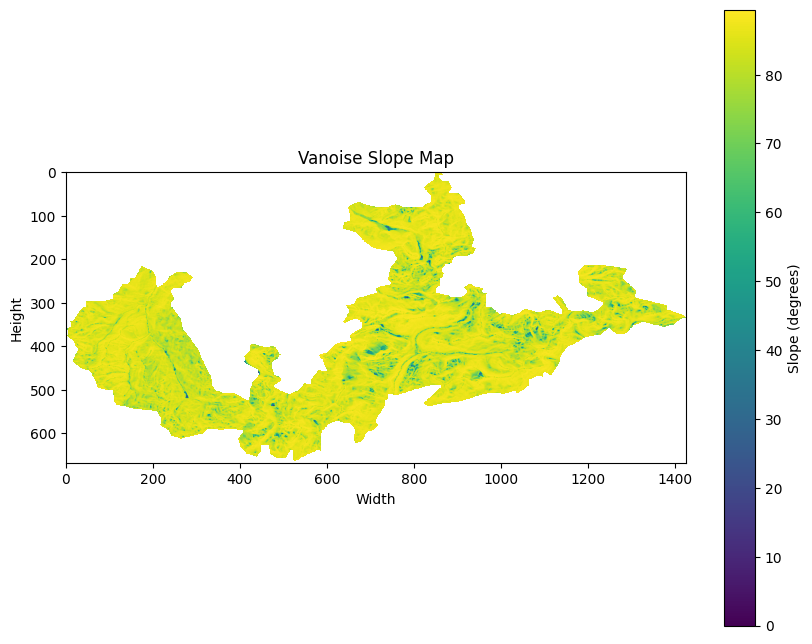

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(van_slope.read(1, masked=True))

plt.title("Vanoise Slope Map")
plt.xlabel("Width")
plt.ylabel("Height")
plt.colorbar(label="Slope (degrees)")

plt.show()

**3.2. Figure 3: Vanoise Slope (30º - 45º) Analysis Map**

The below map shows the number of areas that comprise slope angles between 30º - 45º are relatively small yet widespread across the Vanoise National Park. The areas outside the purple are the areas that have the highest avalanche risk in terms of slope angle.

In [ ]:
van_slope_sub = rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/slope_feature_specific.tif')

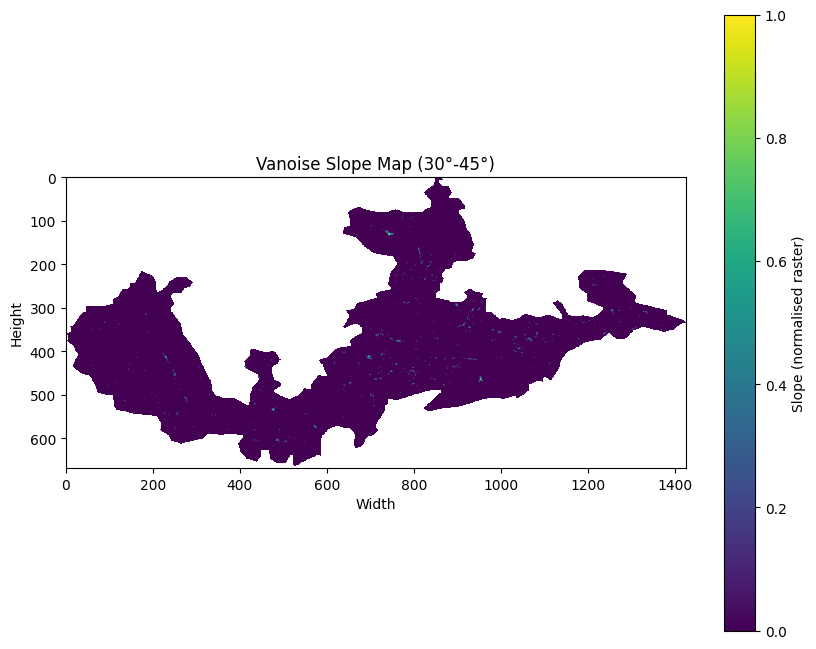

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(van_slope_sub.read(1, masked=True))

plt.title("Vanoise Slope Map (30°-45°)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.colorbar(label="Slope (normalised raster)")

plt.show()

**3.3. Figure 4: Vanoise Elevation Analysis Map**

The below map shows a huge variation in elevation profiles in the Vanoise National Park. The elevation ranges from 615m to 3652m.

In [ ]:
van_elevation = rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/VanoiseElevation.tif')

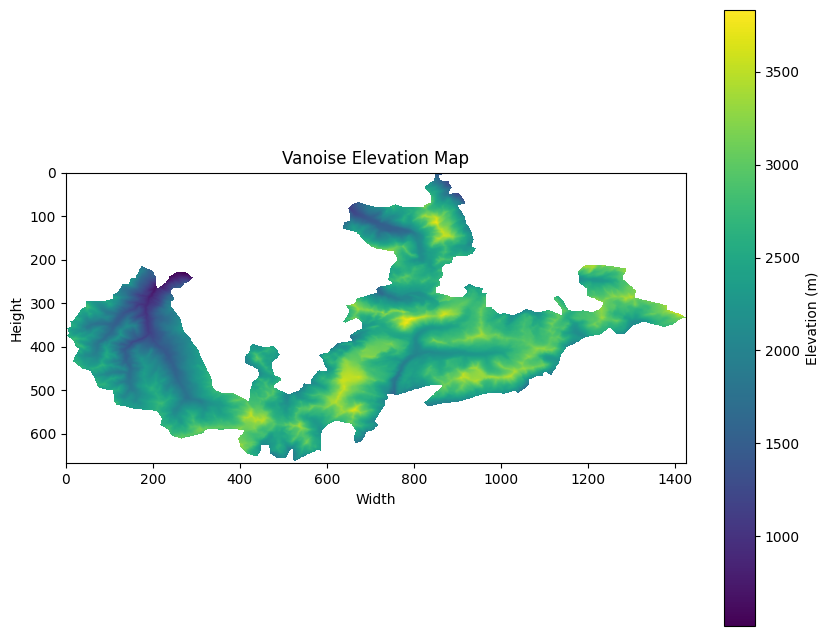

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(van_elevation.read(1, masked=True))

plt.title("Vanoise Elevation Map")
plt.xlabel("Width")
plt.ylabel("Height")
plt.colorbar(label="Elevation (m)")

plt.show()

**3.4. Figure 5: Vanoise Aspect Analysis Map**

The below map visualises the range of aspects in terms of which direction certain slopes face, 0.2 being South-facing slopes (135º to 225º) and 1.0 being North-facing slopes (315º to 45º). For the purpose of this research, North-facing slopes are the most important to consider in terms of avalanche risk.

In [ ]:
van_aspect = rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/van_aspect_reclassified.tif')

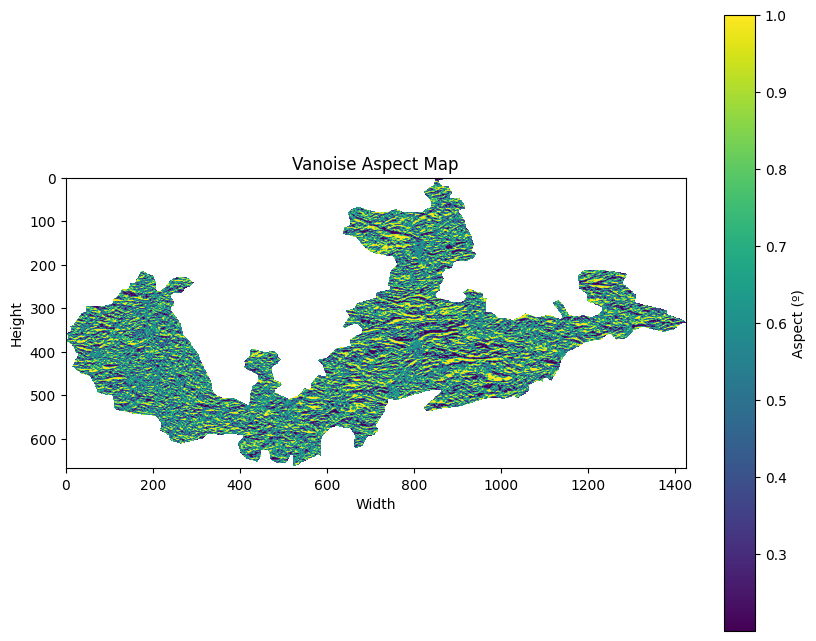

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(van_aspect.read(1, masked=True))

plt.title("Vanoise Aspect Map")
plt.xlabel("Width")
plt.ylabel("Height")
plt.colorbar(label="Aspect (º)")

plt.show()

**3.5. Figure 6: Land Cover  Map**

The below map shows the different land cover categories for the Vanoise National Park. The different 'fid' category numbers each represent a different land cover category.

In [ ]:
Vanoise_landuse = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/landuse_vector .shp')

In [ ]:
Vanoise_landuse.explore(
    column='fid',
    cmap='Set1',
    legend=True,
    tooltip='fid'
)

**3.6. Figure 7: Forested Land Cover Area for Vanoise National Park.**

The below plot shows few forested areas that are concentrated around the boundaries of the national park. This is likely due to the abundance of ski resorts within the Vanoise National Park as well as higher elevations towards the centre of the national park.



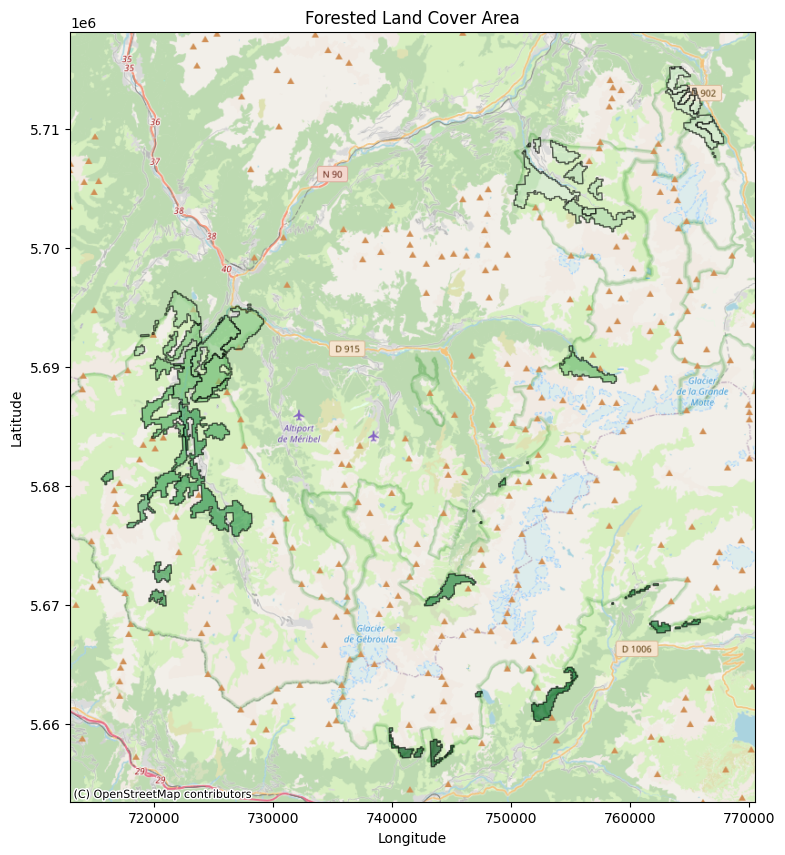

In [ ]:
Vanoise_forest = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/VanoiseForest.shp')

Vanoise_forest = Vanoise_forest.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
Vanoise_forest.plot(ax=ax, alpha=0.6, edgecolor='black', cmap='Greens')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Forested Land Cover Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

**3.7. Figure 8: Exposed Areas Land Cover Map for Vanoise**

The below map shows areas of the Vanoise National Park which are classed as exposed. Compared to forested areas, there are far more exposed areas which are spread across the national park. Most of these bare areas are concentrated where elevation is highest, such as glaciers (Copernicus.eu, 2024).

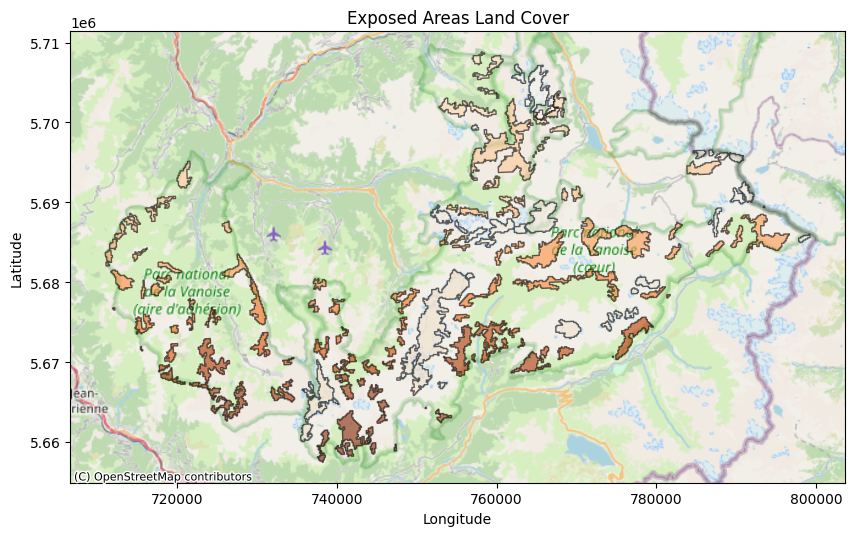

In [ ]:
Vanoise_exposed = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/Vanoise_bareland.shp')

Vanoise_exposed = Vanoise_exposed.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
Vanoise_exposed.plot(ax=ax, alpha=0.6, edgecolor='black', cmap='Oranges')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Exposed Areas Land Cover")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

**3.8. Figure 9: Avalanche Risk Map for Vanoise**

The below map shows areas of the Vanoise National Park which have the highest avalanche risk (1) and areas with the lowest risk (0). Given that slope was given the largest weighting for this suitability map (52%), areas with highest risk are those which are classed as being on slopes between 30º and 45º. Elevation (33%) and aspect (15%) are also presented on this map.

In [ ]:
van_avalanche_risk = rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/new_suitability.tif')

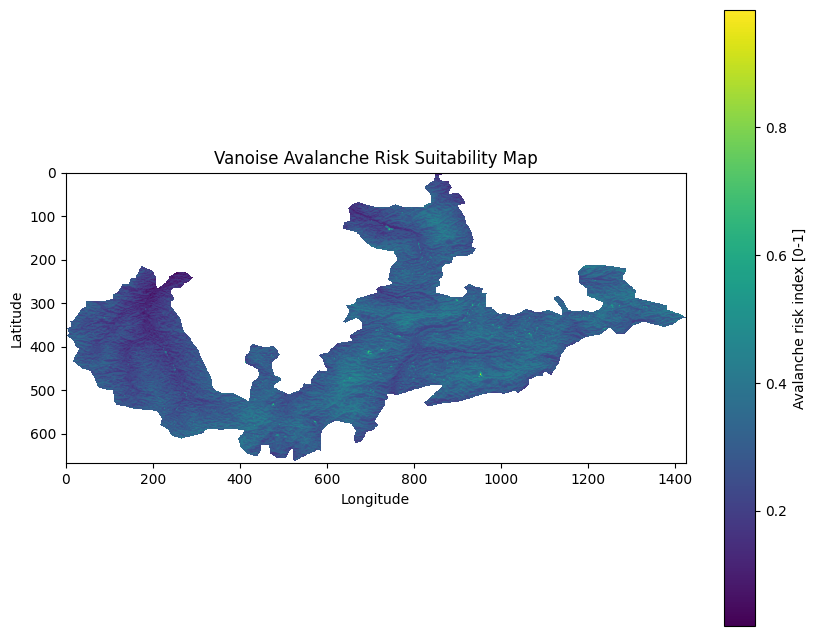

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(van_avalanche_risk.read(1, masked=True))

plt.title("Vanoise Avalanche Risk Suitability Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Avalanche risk index [0-1]")

plt.show()

**3.9. Figure 10: Avalanche Risk Map for Vanoise with Forested Area Overlay**

The below map shows the avalanche risk map from Fig.9 with the forested areas vector overlaid. This is to distinguish areas which are considered safer in terms of avalanche risk.

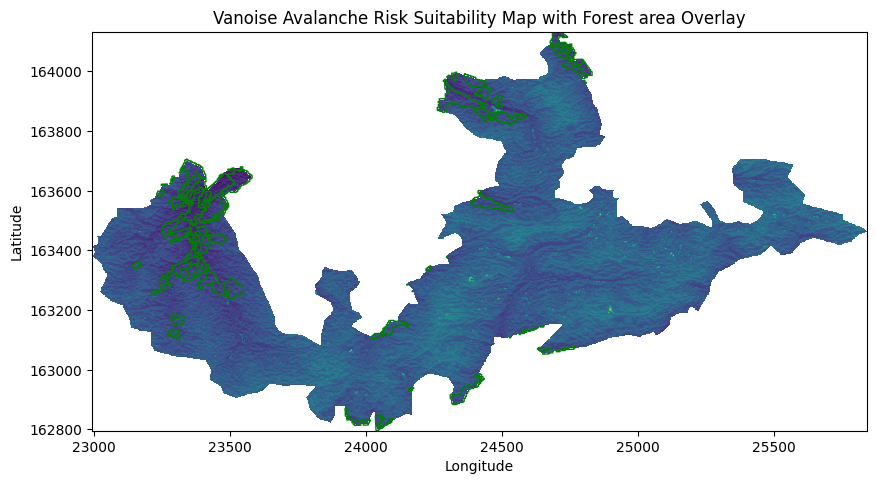

In [ ]:
from rasterio.plot import show

Vanoise_forest = Vanoise_forest.to_crs(van_avalanche_risk.crs)
fig, ax = plt.subplots(figsize=(10, 10))

suitability_data = van_avalanche_risk.read(1, masked=True)
show(suitability_data, transform=van_avalanche_risk.transform, ax=ax, cmap='viridis')

Vanoise_forest.plot(ax=ax, edgecolor='green', color='none')

plt.title("Vanoise Avalanche Risk Suitability Map with Forest area Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**3.10. Figure 11: Avalanche Risk Map for Vanoise with Exposed Areas Overlay**

The below map shows the avlanche risk map from Fig.9 with exposed areas overlaid to highlight which areas may pose more avalanche danger due to factors like wind loading. Several areas classed as having the highest avalanche risk from Fig.9 can be found within exposed area outlines.

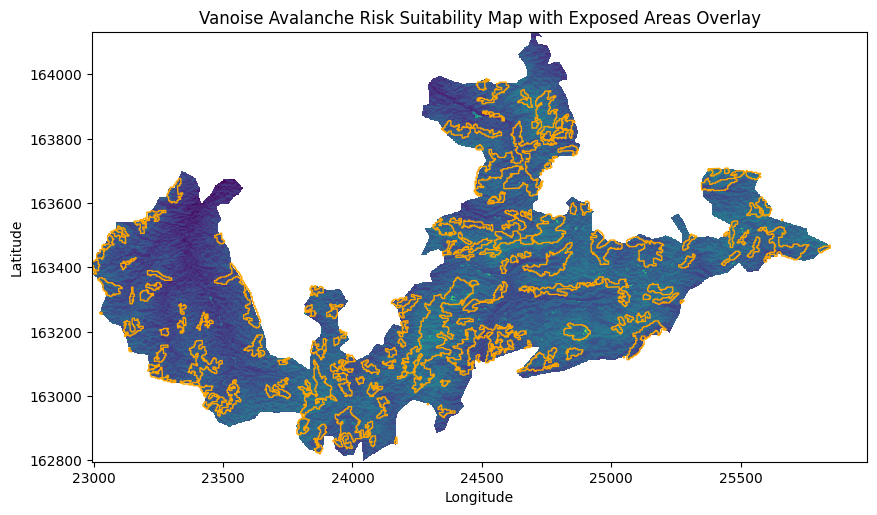

In [ ]:
from rasterio.plot import show

Vanoise_exposed = Vanoise_exposed.to_crs(van_avalanche_risk.crs)
fig, ax = plt.subplots(figsize=(10, 10))

suitability_data = van_avalanche_risk.read(1, masked=True)
show(suitability_data, transform=van_avalanche_risk.transform, ax=ax, cmap='viridis')

Vanoise_exposed.plot(ax=ax, edgecolor='orange', color='none')

plt.title("Vanoise Avalanche Risk Suitability Map with Exposed Areas Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 4. Discussion


**4.1. Answering Research Question**  

The results show that GIS can certainly be used to plot avalanche risk zone maps, particularly potential avalanche trigger points. Although the results show a huge variation in the terrain in mountainous regions, it is important to understand how different variations can contribute to the triggering of potential avalanches. Given that slope was the criterion with the largest weight in terms of suitability (52%), the areas that fit all the criteria which can be classed as ‘high risk’ (closer to ‘1’ on colourbar) are sparse yet widespread across the entire national park. The fact that potential ‘high risk’ avalanche zones are not concetrated in one area but found in various places within the area emphasises the need to inform avalanche patrollers where avalanches may be triggered in order to take preventative measures to mitigate any threat to livelihoods, fatalities, or damage to property (Nasery and Kalkan, 2021).  

**4.2. Advantages**

The data used for this project allowed me to calculate all the features required for the suitability map (DEM) as well as select specific land cover features for my additional vectors (CORINE) with no issues in terms of CRS projections.

**4.3. Limitations**

As Nasery and Kalkan (2021) conducted in their research, I originally planned to mask areas that comprised water bodies and water sources to show where avalanche risk is absent, however, I believe the water bodies/sources did not comprise a large enough area within the national park extent to be recognised when I attempted to extract these features as a separate vector. Perhaps this was due to the fact the resolution for the CORINE dataset was 100m. The second limitation which was mentioned briefly was my inability to calculate curvature, a relatively important criterion when assessing avalanche risk given that avalanches tend to be triggered on convex slopes where snow accumulates in an unstable fashion rather than concave slopes (Nasery and Kalkan, 2021). This was due to a ‘group policy’ issue in QGIS regarding the GRASS plugin preventing me from measuring curvature. Fortunately, given Nasery and Kalkan (2021) only assigned a 7% weighting to this category, it will not have affected the results too drastically, yet it is still an important consideration for avalanche formation. The final limitation to this research is the fact the most recent CORINE land cover data shows land cover from 2018. This data is therefore 6 years old and land cover may have changed since then.


## 5. Conclusion

In conclusion, GIS can certainly be used to map avalanche risk zones in mountainous regions yet in order to ensure accuracy, it is imperative to use the most recent data sets available in case there have been land cover changes which could significantly alter the results of an avalanche risk suitability map. Through my research, I successfully measured three of the most important features when considering avalanche risk including slope, elevation, and aspect and successfully extracted separate vectors for specific land covers, such as forests and exposed areas which I overlaid on my suitability map. My research has allowed me to visualise avalanche risk zones in the Vanoise National Park which is becoming increasingly important for risk mitigation and the prediction of avalanche bulletins, particularly as global warming worsens which will significantly influence the frequency and intensity of avalanches, rendering the purpose of this research more timely.


## 6. References


Copernicus.eu. (2024a). 3.1.1 Broad-leaved forest. [online] Available at: https://land.copernicus.eu/content/corine-land-cover-nomenclature-guidelines/html/index-clc-311.html.

Copernicus.eu. (2024b). 3.1.2 Coniferous forest. [online] Available at: https://land.copernicus.eu/content/corine-land-cover-nomenclature-guidelines/html/index-clc-312.html [Accessed 28 Nov. 2024].

Copernicus.eu. (2024c). 3.1.3 Mixed forest. [online] Available at: https://land.copernicus.eu/content/corine-land-cover-nomenclature-guidelines/html/index-clc-313.html [Accessed 28 Nov. 2024].

EAWS (2023). Fatalities 2022/23 – EAWS. [online] avalanches.org. Available at: https://www.avalanches.org/fatalities/fatalities-2022-23/.

Eckert, N., Corona, C., Giacona, F., Gaume, J., Mayer, S., van Herwijnen, A., Hagenmuller, P. and Stoffel, M. (2024). Climate change impacts on snow avalanche activity and related risks. Nature Reviews Earth & Environment, [online] 5(5), pp.369–389. doi:https://doi.org/10.1038/s43017-024-00540-2.

Kriz, K. (n.d.). Using GIS and 3D Modeling for Avalanche Hazard Mapping. [online] Available at: https://mountaincartography.icaci.org/publications/papers/ica_cmc_sessions/2_Beijing_Session_Mountain_Carto/5_Beijing_Kriz.pdf.

Mccollister, C. and Birkeland, K. (n.d.). Using Geographic Information Systems for Avalanche Work. The Avalanche Review, [online] 24(4). Available at: https://avalanche.org/wp-content/uploads/2018/08/06_TAR_McCollisterBirkeland.pdf.

Nasery, S. and Kalkan, K. (2021). Snow avalanche risk mapping using GIS-based multi-criteria decision analysis: the case of Van, Turkey. Arabian Journal of Geosciences, 14(9). doi:https://doi.org/10.1007/s12517-021-07112-4.

Peitzsch, E.H., Martin-Mikle, C., Jordy Hendrikx, Birkeland, K. and Fagre, D. (2024). Characterizing vegetation and return periods in avalanche paths using lidar and aerial imagery. Arctic Antarctic and Alpine Research, 56(1). doi:https://doi.org/10.1080/15230430.2024.2310333.

Pralognan. (2022). Vanoise National Park - Pralognan. [online] Available at: https://www.pralognan.com/en/activities/summer-activities/vanoise-national-park/.

SeeChamonix.com. (2023). Avalanche safety in Chamonix. [online] Available at: https://www.seechamonix.com/avalanches.

Snowsafe : Avalanche safety products and Backcountry equipment. (n.d.). Snowsafe. [online] Available at: https://www.snowsafe.co.uk/avalanche-factors/.

Thormeier , P. (2017). Shapefiles - Of avalanches and ibexes · Blog · Liip. [online] Liip. Available at: https://www.liip.ch/en/blog/shapefiles-of-avalanches-and-ibexes [Accessed 27 Nov. 2024].

In [ ]:
pip install bibtexparser

In [ ]:
import bibtexparser
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

references = '/content/drive/MyDrive/Colab Notebooks/data/IRP DATA/My first project-2.bib'

with open(references, 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

for entry in bib_database.entries:
    print(entry)


{'organization': 'Pralognan', 'year': '2022', 'url': 'https://www.pralognan.com/en/activities/summer-activities/vanoise-national-park/', 'title': 'Vanoise National Park - Pralognan', 'month': '01', 'ENTRYTYPE': 'misc', 'ID': 'a2022_vanoise'}
{'organization': 'SeeChamonix.com', 'year': '2023', 'url': 'https://www.seechamonix.com/avalanches', 'title': 'Avalanche safety in Chamonix', 'month': '10', 'ENTRYTYPE': 'misc', 'ID': 'a2023_avalanche'}
{'organization': 'Snowsafe : Avalanche safety products and Backcountry equipment', 'url': 'https://www.snowsafe.co.uk/avalanche-factors/', 'title': 'Snowsafe', 'ENTRYTYPE': 'misc', 'ID': 'snowsafe'}
{'organization': 'Liip', 'year': '2017', 'urldate': '2024-11-27', 'url': 'https://www.liip.ch/en/blog/shapefiles-of-avalanches-and-ibexes', 'title': 'Shapefiles - Of avalanches and ibexes · Blog · Liip', 'month': '12', 'author': 'Thormeier , Pascal', 'ENTRYTYPE': 'misc', 'ID': 'thormeier_2017_shapefiles'}
{'url': 'https://mountaincartography.icaci.org/pu